<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2018/3/20" data-toc-modified-id="2018/3/20-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2018/3/20</a></span></li><li><span><a href="#2018/3/19-③" data-toc-modified-id="2018/3/19-③-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2018/3/19 ③</a></span><ul class="toc-item"><li><span><a href="#file:-prac_concurrent_paralell.py" data-toc-modified-id="file:-prac_concurrent_paralell.py-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>file: prac_concurrent_paralell.py</a></span><ul class="toc-item"><li><span><a href="#使い方" data-toc-modified-id="使い方-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>使い方</a></span></li></ul></li><li><span><a href="#参考URL" data-toc-modified-id="参考URL-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>参考URL</a></span></li><li><span><a href="#わかったこと" data-toc-modified-id="わかったこと-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>わかったこと</a></span></li></ul></li><li><span><a href="#2018/3/19-②" data-toc-modified-id="2018/3/19-②-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2018/3/19 ②</a></span><ul class="toc-item"><li><span><a href="#file:-prac_flask.py" data-toc-modified-id="file:-prac_flask.py-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>file: prac_flask.py</a></span><ul class="toc-item"><li><span><a href="#使い方" data-toc-modified-id="使い方-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>使い方</a></span></li></ul></li><li><span><a href="#参考URL" data-toc-modified-id="参考URL-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>参考URL</a></span></li><li><span><a href="#わかったこと" data-toc-modified-id="わかったこと-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>わかったこと</a></span></li></ul></li><li><span><a href="#2018/3/19-①" data-toc-modified-id="2018/3/19-①-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2018/3/19 ①</a></span><ul class="toc-item"><li><span><a href="#file:-prac_subprocess.py" data-toc-modified-id="file:-prac_subprocess.py-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>file: prac_subprocess.py</a></span><ul class="toc-item"><li><span><a href="#使い方" data-toc-modified-id="使い方-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>使い方</a></span></li></ul></li><li><span><a href="#参考" data-toc-modified-id="参考-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>参考</a></span></li><li><span><a href="#横道" data-toc-modified-id="横道-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>横道</a></span><ul class="toc-item"><li><span><a href="#2コア説" data-toc-modified-id="2コア説-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>2コア説</a></span></li><li><span><a href="#4コア説" data-toc-modified-id="4コア説-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>4コア説</a></span></li></ul></li><li><span><a href="#わかったこと" data-toc-modified-id="わかったこと-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>わかったこと</a></span></li></ul></li></ul></div>

# 2018/3/20

- やること
- effective python p.146を読み進める
- multiprocessingもやってみる。joblibってなに？
- concurrent.futuresについて調べる
- asyncioの仕組みについて調べる ハイパフォーマンスPython p .185
- 昨日やったプログラムがなぜほとんど差がつかなかったのかを調べる
 - →もっと処理回数を極端に増やして差が大きくなるように工夫してみる


# 2018/3/19 ③

## file: prac_concurrent_paralell.py

### 使い方
下の方の「実行」の実行したい関数のコメントアウトを外して実行する。

## 参考URL
https://qiita.com/castaneai/items/9cc33817419896667f34

## わかったこと
以下のような結果が得られた。<br/>
これによってわかったことは、どれにもあまり違いが見られなかった。


In [ ]:
# epoch = 3

# Thread
#===============
# real	0m9.231s
# user	0m0.150s
# sys	0m0.059s

# concurrent.futures.ThreadPoolExecutor
# ===============
# real	0m9.328s
# user	0m0.183s
# sys	0m0.077s

# concurrent.futures.ProcessPoolExecutor
# ===============
# real	0m9.245s
# user	0m0.167s
# sys	0m0.077s

# asyncio
# ===============
# real	0m9.229s
# user	0m0.150s
# sys	0m0.058s



# 2018/3/19 ②

## file: prac_flask.py

### 使い方
`$ python prac_flask.py`でFlaskを立ち上げ、
1から6のリンクを新しいタブで逐次開く。



In [ ]:
# https://qiita.com/5zm/items/251be97d2800bf67b1c6
# -*- coding: utf-8 -*-
from flask import Flask, render_template, make_response, request, redirect, url_for
import random
import numpy as np
from time import sleep
import time

# flask
app = Flask(__name__)

@app.route('/')
def index():
    title = "ようこそ"
    return render_template('index.html')

# rest api
@app.route('/<string:value>', methods=['GET'])
def hello(value):
    start = time.time()
    result = 'hello {0}'.format(value)
    print('[start] ' + result)

    time.sleep(5)

    elapsed_time = time.time() - start
    print(f'[end] {result} time:{elapsed_time}')
    return(make_response(result))

# main
if __name__ == "__main__":
    # 同時アクセスができない（並列処理が不可能）
    # app.run(host='localhost', port=3000)

    # 同時アクセスができる（並列処理が可能）
    app.run(host='localhost', port=3000, threaded=True)


 * Running on http://localhost:3000/ (Press CTRL+C to quit)



## 参考URL
https://qiita.com/5zm/items/251be97d2800bf67b1c6
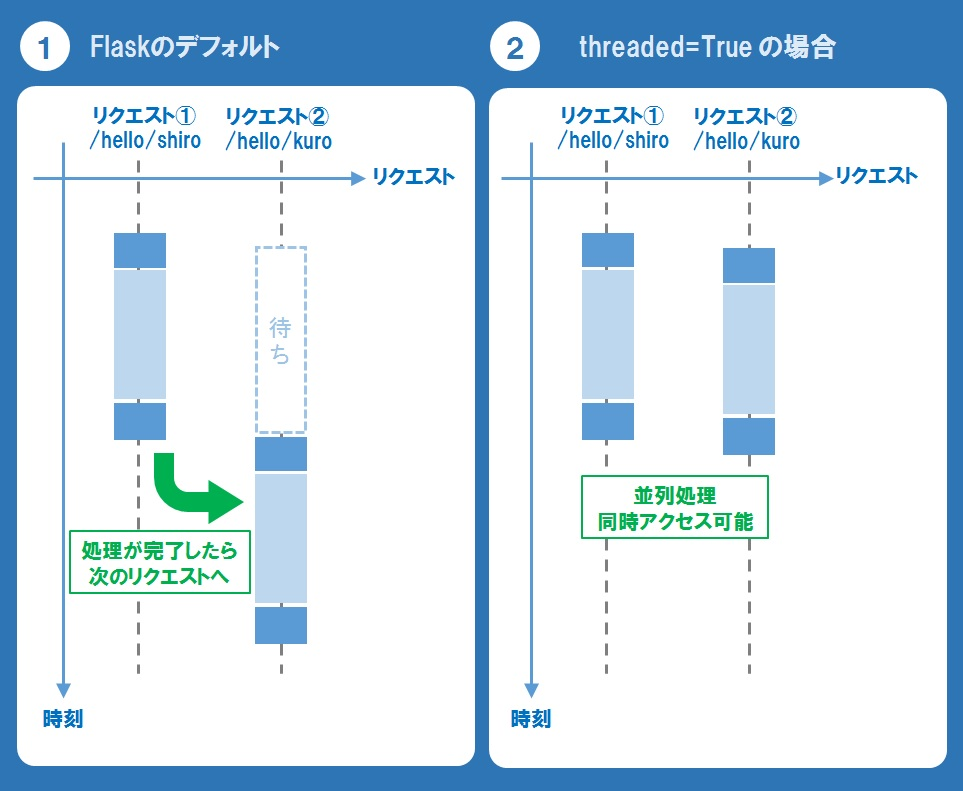

## わかったこと
Flaskを使うにあたって、並列処理(ほんまに並列処理かどうかはまだ調べていないが、参考URL先では「並列処理」と呼んでいた)をする方法。

以下のようにした場合、上の画像の左図のように逐次実行される。<br/>
よって結果はNo1のページが読み込まれたあとにNo2が読み込まれる。

In [1]:
app.run(host='localhost', port=3000)

NameError: name 'app' is not defined

以下のようにthreadedを指定すると上の画像の右図のように並列処理(?)される。<br/>
よって結果はNo1からNo6まで同時に読み込みが開始され、終わったものから終了する。

In [ ]:
app.run(host='localhost', port=3000, threaded=True)

# 2018/3/19 ①

## file: prac_subprocess.py

### 使い方
普通に実行

## 参考
effective python p.118

## 横道
今、わからないことは、この実行したmacにいくつのCPUがあるかである。
### 2コア説
「このmacについて」のcpuのコア数のところに2コアと書かれている<br>

### 4コア説
アクティビティモニタのCPUの履歴が4つのグラフが表示される。<br>
wikipediaによるとi5のCPUは4コア4スレッドのはずである<br>
pythonのos.cpu_count()の出力が4である<br>

## わかったこと

subprocessのcommunicate()を付けたときと、付けなかったときの処理時間を可視化した。
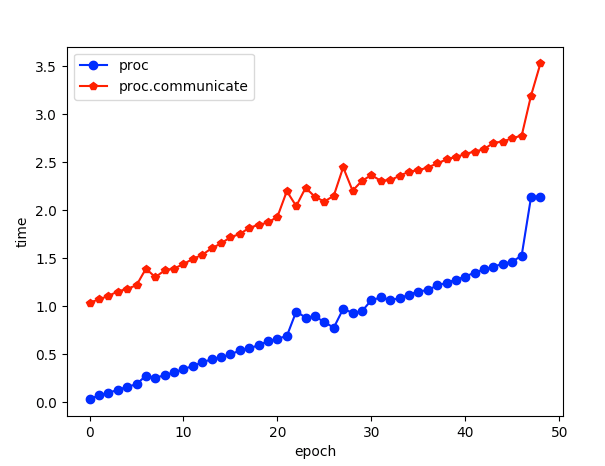

communicate()をつけると同期が実行されるので、待ち時間が長くなり、遅くなる。<br>
付けない場合は、非同期で実行されるので、待ち時間が少なくなり、速くなる。

このマシン自体にCPUがいくつ載っているのか不明だが、単純に倍になるのではなく、常に1秒の差が出るような結果になった。

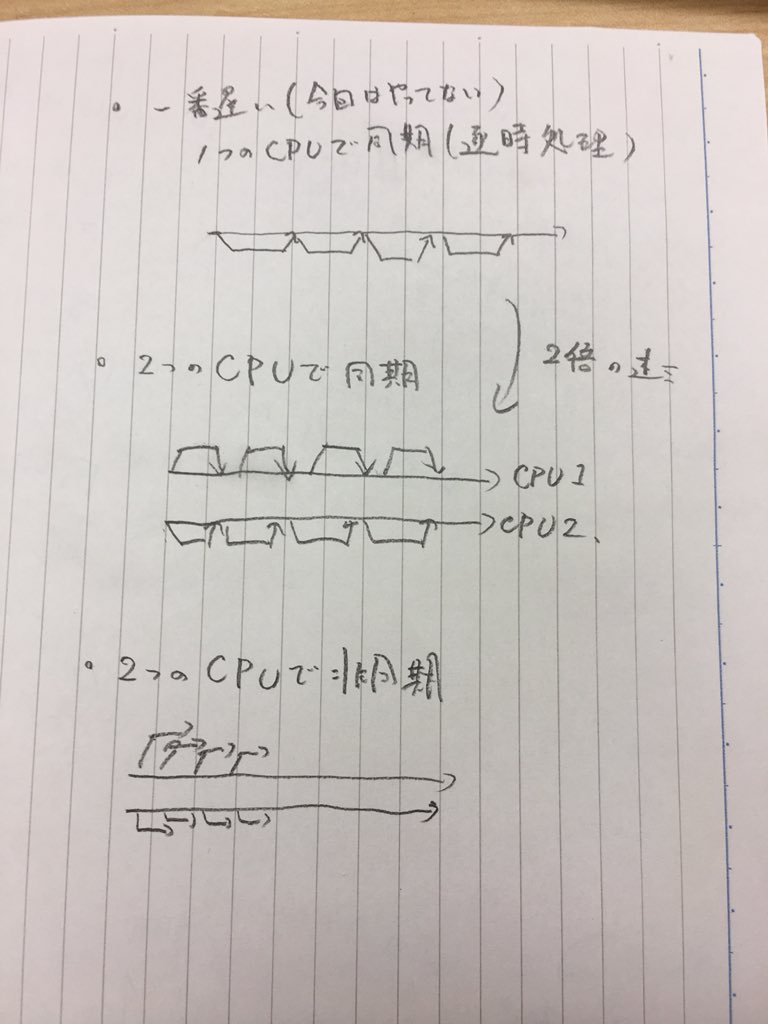

また、epoch=10のときに着目してみると、同期する場合(図では赤色のグラフ)を見たときに、1.35秒で処理が終了している。<br>
1sのsleepを10回実行しているので逐次処理実行するのであれば10秒以上かかるはずであるが、こんなに早く終わっているということは、subprocessによって複数の子プロセスを並列に実行していることがわかる。
